In [1]:
%matplotlib widget


# Read and plot an image from a FITS file

This example opens an image stored in a FITS file and displays it to the screen.

This example uses `astropy.utils.data` to download the file, `astropy.io.fits` to open
the file, and `matplotlib.pyplot` to display the image.


*By: Lia R. Corrales, Adrian Price-Whelan, Kelle Cruz*

*License: BSD*


Set up matplotlib and use a nicer set of plot parameters



In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.visualization import make_lupton_rgb
import numpy as np
plt.style.use(astropy_mpl_style)

Download the example FITS files used by this example:



In [4]:

from astropy.io import fits

rurl = 'MAST_2022-09-01T0817/JWST/jw02107-c1003_t003_nircam_clear-f360m/jw02107-c1003_t003_nircam_clear-f360m_i2d.fits'
gurl = 'MAST_2022-09-01T0817/JWST/jw02107-c1003_t003_nircam_clear-f335m/jw02107-c1003_t003_nircam_clear-f335m_i2d.fits'
burl = 'MAST_2022-09-01T0817/JWST/jw02107-c1003_t003_nircam_clear-f300m/jw02107-c1003_t003_nircam_clear-f300m_i2d.fits'

Use `astropy.io.fits.info()` to display the structure of the file:



In [5]:
fits.info(rurl)

Filename: MAST_2022-09-01T0817/JWST/jw02107-c1003_t003_nircam_clear-f360m/jw02107-c1003_t003_nircam_clear-f360m_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     366   ()      
  1  SCI           1 ImageHDU        75   (2198, 4056)   float32   
  2  ERR           1 ImageHDU        10   (2198, 4056)   float32   
  3  CON           1 ImageHDU         9   (2198, 4056)   int32   
  4  WHT           1 ImageHDU         9   (2198, 4056)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2198, 4056)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2198, 4056)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (2198, 4056)   float32   
  8  HDRTAB        1 BinTableHDU    816   16R x 403C   [23A, 5A, 3A, 49A, 7A, 13A, 6A, 5A, 7A, 10A, 4A, L, D, D, D, D, 32A, 49A, 70A, 11A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 14A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D, D, D, 

Generally the image information is located in the Primary HDU, also known
as extension 0. Here, we use `astropy.io.fits.getdata()` to read the image
data from this first extension using the keyword argument ``ext=0``:



In [9]:
r= fits.getdata(rurl, ext=1)
g= fits.getdata(gurl, ext=1)
b= fits.getdata(burl, ext=1)
rgb_default = make_lupton_rgb(r[:,:-1], g, b[:,:-1])

The data is now stored as a 2D numpy array. Print the dimensions using the
shape attribute:



In [10]:
print(r.shape)

(4056, 2198)


Display the image data:



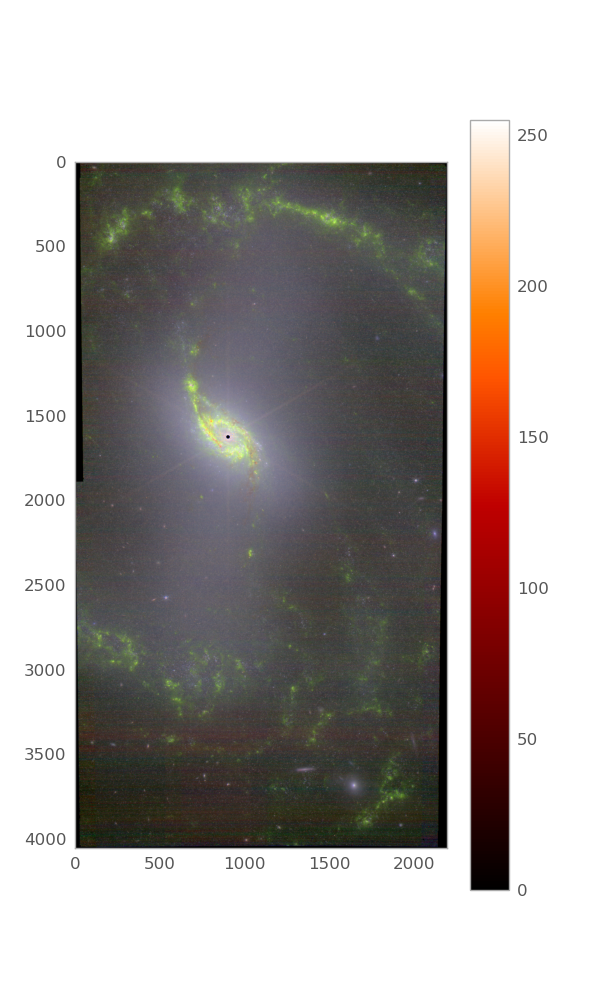

In [26]:
rgb_default = make_lupton_rgb(r[:,:-1], g*0.9, b[:,:-1],Q=10,stretch=0.7)
plt.figure(figsize=(6,10))
plt.imshow(rgb_default)
plt.colorbar()
plt.grid(False)